In [2]:
####Notes:

#sex=     1-male, 0-female                                            
#fbs=     1-yes,0-no
#restecg= 1-yes,0-no
#exang=   1-yes,0-no
#target=  1-yes,0-no 

#cp------------- chest pain type
#trestbps------- resting blood pressure
#chol----------- serum cholestrol
#fbs------------ fasting blood sugar
#restecg-------- resting electrocardiograpic
#thalach-------- maximum heart rate achieved
#exang---------- exercise induced angina
#oldpeak-------- ST depression induced by exercise relative to rest
#slope---------- the slope of the peak exercise ST segment.
#ca------------- number of major vessels 0-3 colored by fluoroscopy
#thal----------- normal, fixed defect, reversible defect

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams                                            
from matplotlib.cm import rainbow     
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('dataset.csv')                                                #loading dataset

In [4]:
# dataset analyzing
print("SHAPE:", df.shape)
print("COLUMNS:", df.columns)
print("HEAD:", df.head())
print("DESCRIBE:", df.describe())

SHAPE: (303, 14)
COLUMNS: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
HEAD:    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
DESCRIBE:               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()                                                            #to find null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
###Note : the dataset does not contain null values

<AxesSubplot:>

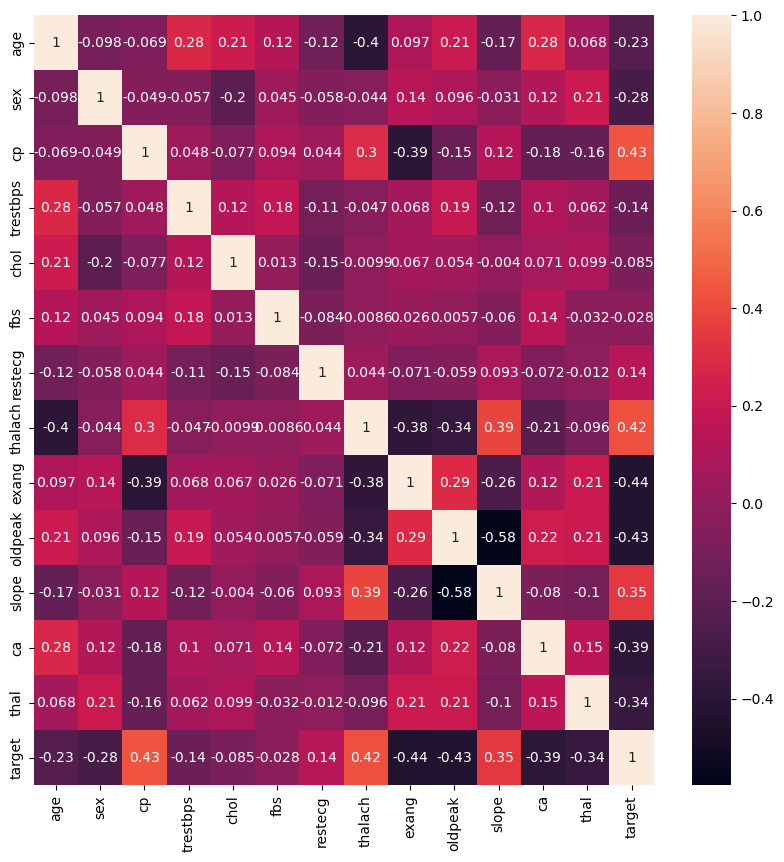

In [8]:
#vizualization dataset(feature selection)
#heatmap(correlation map) 
plt.figure(figsize=(10,10))
cor=df.corr() 
sns.heatmap(cor, annot=True)

In [9]:
###we observed from heatmap(highly)
# +VE CORRELATION:-   target and cp, thalach, slope. 
# -VE CORRELATION:-   target and exang, oldpeak, ca, thal.

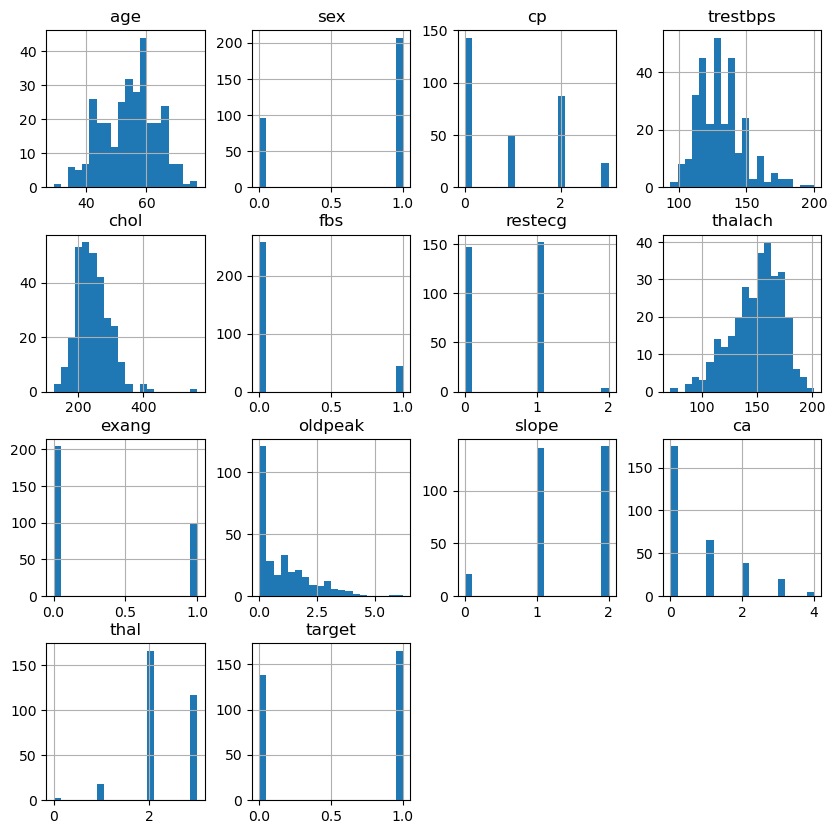

In [10]:
df.hist(bins=20, figsize=(10,10))
plt.show()

In [11]:
#We split our dataset into two categories to make it easier for analysis
###based on df.head:-
# Data visualization:
categorical_data = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
continuous_data  = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

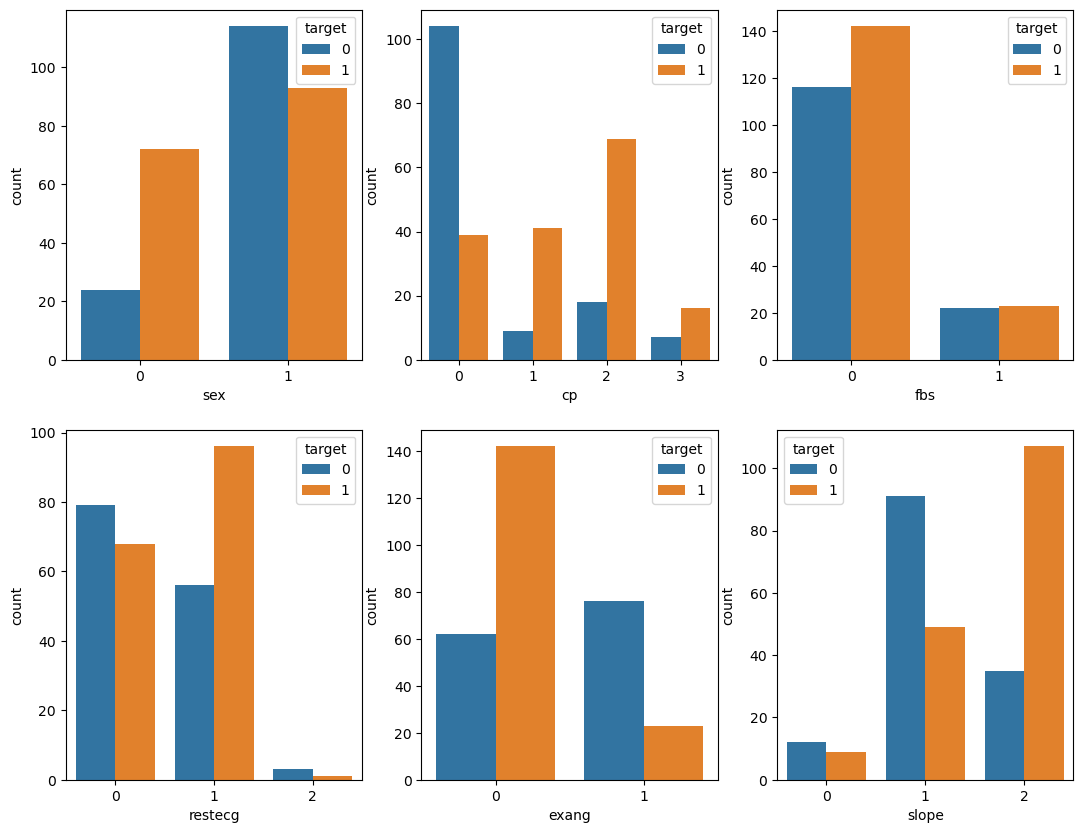

In [51]:
# Plotting the impact of categorical variables on target

plt.figure(figsize=(13,10))
for i,cat in enumerate(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']):                                  
    plt.subplot(2,3,i+1)                                   
    sns.countplot(data = df, x= cat, hue = "target")
plt.show()

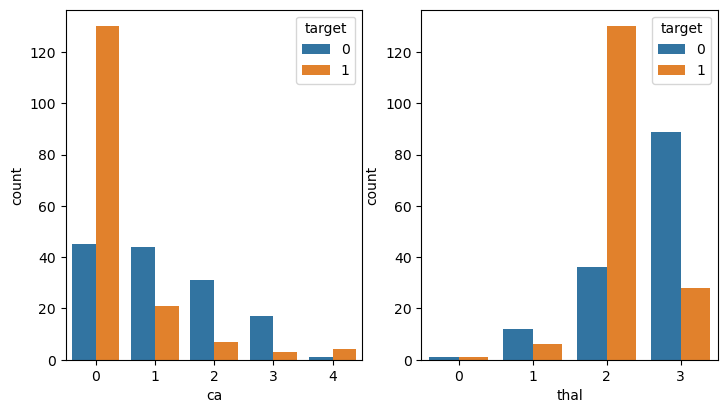

In [52]:
# Plotting the impact of categorical variables on target

plt.figure(figsize=(13,10))
for i,cat in enumerate(['ca', 'thal']):                                  
    plt.subplot(2,3,i+1)                                    #categorical_data
    sns.countplot(data = df, x= cat, hue = "target")
plt.show()

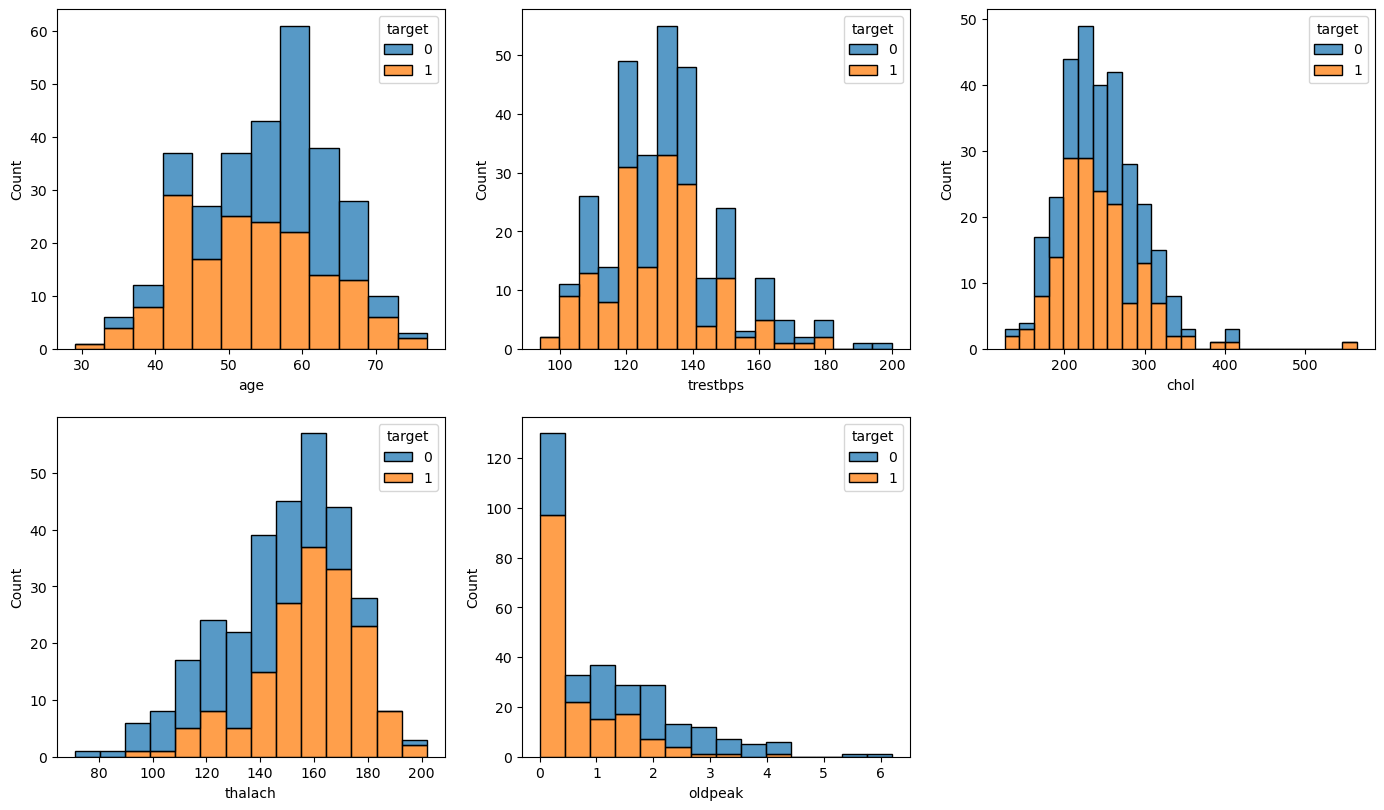

In [13]:
# Plotting the impact of continuous variables on target

plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_data):
    plt.subplot(3,3,j+1) 
    sns.histplot(data = df, x= con, hue = "target", multiple="stack")
plt.show()

In [14]:
for i,cat in enumerate(categorical_data):
     print(i, cat)

0 sex
1 cp
2 fbs
3 restecg
4 exang
5 slope
6 ca
7 thal


In [15]:
for i,cat in enumerate(continuous_data):
    print(i, cat)

0 age
1 trestbps
2 chol
3 thalach
4 oldpeak


In [16]:
#DATA MODELING
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [18]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [19]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [20]:
y=df["target"]
x=df.drop(["target"],axis=1)

In [21]:
### CLASSIFICATION ALGORITHMS
from sklearn.linear_model import LogisticRegression     
from sklearn.svm import SVC                             
from sklearn.tree import DecisionTreeClassifier         
from sklearn.naive_bayes import GaussianNB              
from sklearn.ensemble import RandomForestClassifier     
from sklearn.neighbors import KNeighborsClassifier      

In [23]:
#1 KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)                             
    score=cross_val_score(knn_classifier,x,y,cv=10)                         
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

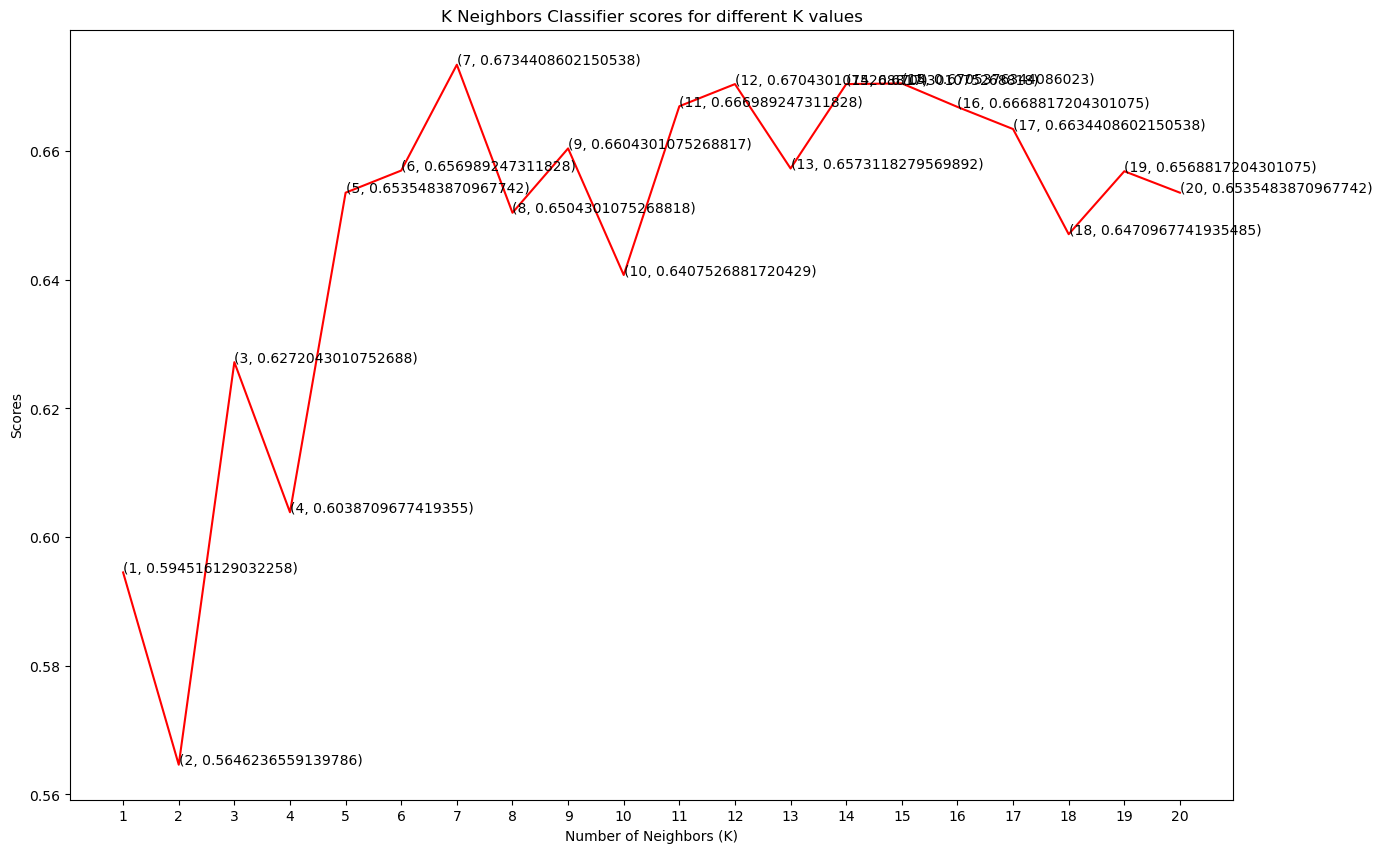

In [57]:
plt.figure(figsize=(15,10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')          #figsize=(10,10)
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')                                          
plt.ylabel('Scores')                                                        
plt.title('K Neighbors Classifier scores for different K values')                

In [42]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,y,cv=10)
score.mean()

0.6704301075268817

In [41]:
#2.randomforest_classifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,x,y,cv=10)
score.mean()

0.8086021505376344

In [43]:
#3.Logistic Regression
LRM = LogisticRegression() 
score=cross_val_score(LRM,x,y,cv=10)
score.mean()

0.8316129032258065

In [45]:
#4.Support Vector Machine
SVM = SVC()
score=cross_val_score(SVM,x,y,cv=10)
score.mean()

0.6604301075268817

In [46]:
#5.Decison Tree Classifier
DTCM = DecisionTreeClassifier(criterion="entropy", max_depth=2) 
score=cross_val_score(DTCM,x,y,cv=10)
score.mean()

0.7520430107526883

In [47]:
#6.Naive Bayes
NBM = GaussianNB() 
score=cross_val_score(NBM,x,y,cv=10)
score.mean()

0.8050537634408602